In [1]:
import ads
import numpy as np
import matplotlib.pyplot as plt
import re
from unidecode import unidecode
from astropy.time import Time

In [2]:
faculty_lists = dict()

In [3]:
#List of Astro faculty
faculty_lists['UCH'] = [
    'Blanc, G',
    'Bronfman, L',
    'Campusano, L',
    'Casassus, S',
    'Costa, E',
    'Escala, A',
    'Finger, R',
    'Forster, F.',
    'Lira, P',
    'Lopez, S',
    'Mardones, D',
    'Max Moerbeck, W', 
    'Maza, J',
    'Mendez, R', 
    'Munoz, R',
    'Perez, L', 
    'Rojo, P', 
    'Rubio, M',
    'Ruiz, M'
]

In [4]:
faculty_lists['UDP'] = [
    "Aravena, M",
    "Assef, R",
    "Cieza, L",
    "Jenkins, J",
    "Johnston, E",
    "Jofre, P",
    "Mazzucchelli, C",
    "Prieto, J",
    "Ricci, C",
    "Yang, B",
    "Zurlo, A"
]

In [5]:
faculty_lists['PUC'] = [
    'Aguilera Gomez, C',
    'Barrientos, L', 
    'Bauer, F', 
    'Catelan, M',
    'Chaname, J', 
    'Clocchiatti, A',
    'Dunner, R',
    'Galaz, G',
    'Guzman, V',
    'Petrovich, C',
    'Puzia, T',
    'Tissera, P',
    'Treister, E',
    'Zoccali, M'
]

In [6]:
faculty_lists['UNAB'] = [
    'Anguita, T', 
    'Caceres, C', 
    'Chemin, L',
    'Gavignaud, I',
    'Gomez Camus, M', 
    'Guaita, L',
    'Masetti, N', 
    'Minniti, D', 
    'Monaco, L', 
    'Nantais, J',
    'Ohnaka, K',
]

In [7]:
#https://fisica.usm.cl/departamento/academicos-y-docentes/
faculty_lists['UTSM'] = [
    'Jaffe, Y', 
    'Montero Dorta, A',
    'Schreiber, M',
    'Smith, R', 
    'Toloza, O',
]

In [8]:
faculty_lists["UAI"] = [
    'Benitez Llambay, P', 
    'Brahm, R', 
    'Cuadra, J',
    'Jordan, A', 
    'Mulders, G', 
    'Munoz, D', 
]

In [9]:
faculty_lists["UTA"] = [
    'Boquien, M', 
    'Carballo Bello, J', 
    'Pignata, G',
    'Rojas Ayala, B'
]

In [10]:
faculty_lists["USACH"] = [
    'El Mellah, I',
    'Espinoza, C',
    'Perez, S',
    'Rojas-Arriagada, A',
]

In [11]:
#Search for all papers from UDP in ADS in a given year.
def paper_search(year, affs="portales"):
    q = ads.SearchQuery(aff=affs, year=year, fl=["author", "citation_count", "aff", "property", "doctype", "title", "pubdate", "bibcode"], max_pages=100)
    ql = list(q)
    return ql

In [12]:
def proc_name(input_name):
    name = unidecode(input_name)
    name = re.sub("-"," ", name)
    name = re.sub("^(.*?\, .).*$",r"\1", name)
    return name

In [13]:
#Distribute publications between UDP authors.
def get_n_papers(ads_query_list, faculty, only_faculty=False, affs=["portales"]):
    n_papers = dict()
    for paper in ads_query_list:

        #Only process refereed articles.
        if paper.property is not None and 'REFEREED' in paper.property and paper.doctype=='article':
            pass
        else:
            continue

        inst_auth = list()
        for k in range(len(paper.author)):
            name = proc_name(paper.author[k])
            if len(faculty)==0 or name in faculty:
                found_aff = True
                for aff in affs:
                    if not re.search(aff, unidecode(paper.aff[k]), flags=re.IGNORECASE):
                        found_aff = False
                if found_aff:
                    inst_auth.append(name)
        for name in inst_auth:
            if name in n_papers:
                n_papers[name] += 1./len(inst_auth)
            else:
                n_papers[name] = 1./len(inst_auth)
    return n_papers

In [14]:
ql = dict()
aff_search = dict()
n_papers = dict()

In [15]:
# aff_search["UCH"] = "Universidad de Chile"
# aff_search["UDP"] = "portales"
# aff_search["PUC"] = "Pontificia Universidad Catolica de Chile"
# aff_search["UNAB"] = "Universidad Andres Bello"
# aff_search["UTSM"] = "Universidad Tecnica Federico Santa Maria"
# aff_search["UAI"] = "Universidad Adolfo Ibanez"
# aff_search["UTA"] = "Universidad de Tarapaca"
aff_search["UCH"] = "Universidad de Chile"
aff_search["UDP"] = "portales"
aff_search["PUC"] = "Universidad Catolica"
aff_search["UNAB"] = "Andres Bello"
#aff_search["UTSM"] = "Santa Maria"
aff_search["UAI"] = "Adolfo Ibanez"
aff_search["UTA"] = "Tarapaca"
aff_search["USACH"] = "Universidad de Santiago"

In [16]:
for key in aff_search.keys():
    if key not in ql:
        ql[key] = paper_search(2024, affs=aff_search[key])

In [17]:
inst = "USACH"
#ql[inst] = paper_search(2023, affs=aff_search[inst])
n_papers[inst] = get_n_papers(ql[key], faculty_lists[inst], only_faculty=True, affs=[aff_search[inst]])
np.unique(list(n_papers[inst].keys()))

array(['El Mellah, I', 'Espinoza, C', 'Perez, S'], dtype='<U12')

In [18]:
#Sort dividing papers as they go for incentivos.
for key in ql.keys():
    n_papers[key] = get_n_papers(ql[key], faculty_lists[key], only_faculty=True, affs=[aff_search[key]])

USACH 4.0
UCH 3.0
UDP 9.166666666666666
PUC 4.25
UNAB 5.375
UAI 7.0
UTA 5.75


Text(0, 0.5, 'Numero de articulos')

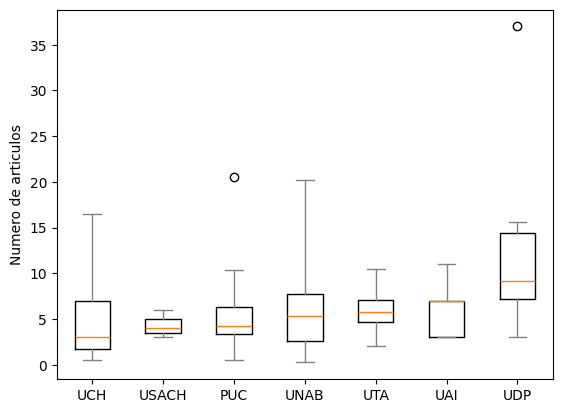

In [19]:
list_for_plots = list()
keys = list(n_papers.keys())
median_papers = dict()
for key in keys:
    median_papers[key] = np.median(list(n_papers[key].values()))
    print(key, median_papers[key])
keys = sorted(keys, key=lambda k:median_papers[k])
for key in keys:
    list_for_plots.append(list(n_papers[key].values()))
plt.boxplot(list_for_plots, whis=3.0, labels=keys, whiskerprops={'color':'gray'}, capprops={'color':'gray'})
plt.ylabel("Numero de articulos")

In [20]:
#Get list for Jose.
def get_papers_per_faculty(ads_query_list, faculty, only_faculty=False, affs=["portales"]):
    papers_per_faculty = dict()
    for name in faculty:
        papers_per_faculty[name] = list()
    for paper in ads_query_list:

        #Only process refereed articles.
        if paper.property is not None and 'REFEREED' in paper.property and paper.doctype=='article':
            pass
        else:
            continue

        inst_auth = list()
        for k in range(len(paper.author)):
            name = proc_name(paper.author[k])
            if len(faculty)==0 or name in faculty:
                found_aff = True
                for aff in affs:
                    if not re.search(aff, unidecode(paper.aff[k]), flags=re.IGNORECASE):
                        found_aff = False
                if found_aff:
                    inst_auth.append(name)
        for name in inst_auth:
            papers_per_faculty[name].append([paper.bibcode, 1./len(inst_auth)])
    return papers_per_faculty

In [21]:
ppf = get_papers_per_faculty(ql['UDP'], faculty_lists['UDP'], affs=[aff_search['UDP']])

In [22]:
for name in ppf.keys():
    print("\n",name)
    for p in ppf[name]:
        print("{:22} {:4.2f}".format(p[0],p[1]))


 Aravena, M
2024ApJ...976...70L    1.00
2024A&A...689A.145S    0.33
2024A&A...691A.133V    0.50
2024A&A...690A.197M    0.50
2024A&A...682A.166F    0.50
2024MNRAS.tmp.2235R    1.00
2024MNRAS.533.3098A    1.00
2024ApJ...961..120C    1.00
2024ApJ...975..196W    1.00
2024MNRAS.527.5808B    1.00
2024A&A...683A..64A    0.50
2024ApJ...967...11C    1.00
2024MNRAS.527.6867A    1.00
2024PASP..136d4503H    1.00
2024A&A...689A.331L    0.33
2024MNRAS.534.2062V    1.00
2024A&A...684A..30M    1.00
2024A&A...682A..24A    1.00
2024A&A...689A..20H    1.00

 Assef, R
2024A&A...688A.157S    0.50
2024A&A...689A.145S    0.33
2024A&A...691A.133V    0.50
2024A&A...690A.197M    0.50
2024ApJ...966...85Z    0.50
2024A&A...691A.203G    0.50
2024A&A...682A.166F    0.50
2024ApJ...975..239F    0.50
2024ApJ...971...40L    1.00
2024ApJ...975..230B    0.50
2024A&A...690A.365S    0.50
2024ApJ...968...49W    0.50
2024MNRAS.532..643Z    0.50
2024ApJS..274...42Z    0.50
2024ApJ...961...93S    0.50
2024A&A...689A.331L    0

In [23]:
#Save all needed information for pretty plot.
cato = open("n_papers_2023.txt","w")
for inst in n_papers.keys():
    for name in faculty_lists[inst]:
        n = 0.0
        if name in n_papers[inst]:
            n = n_papers[inst][name]
        cato.write("{:10s} {:20s} {:5.1f}\n".format(inst, name, n))
cato.close()